# 서브 플롯
    - Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.

### 01. 필요한 패키지 및 샘플 데이터 준비

#### 1) 패키지 참조

In [2]:
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

#### 2) 데이터 가져오기
 - 데이터 출처: KOSIS 국가통계포털

In [4]:
# 데이터 프레임 생성
df = read_excel("C:\\Users\\User\\Desktop\\궁둥박사\\BigdatamegaIT\\수업내용\\D_탐색적_데이터\\01_데이터_시각화/traffic_acc_year.xlsx", index_col='년도' )
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


#### 3) 그래프에 대한 전역 환경 설정
 - pyplot 객체의 한글 폰트, 글자크기, 그래픽 사이즈를 설정한다. 이 코드가 다시 실행되기 전까지 모든 그래프 출력에 대해 적용된다.

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

### 02. 서브플롯 영역 나누기

#### 1) 2행 3열을 갖는 서브 플롯 영역 생성

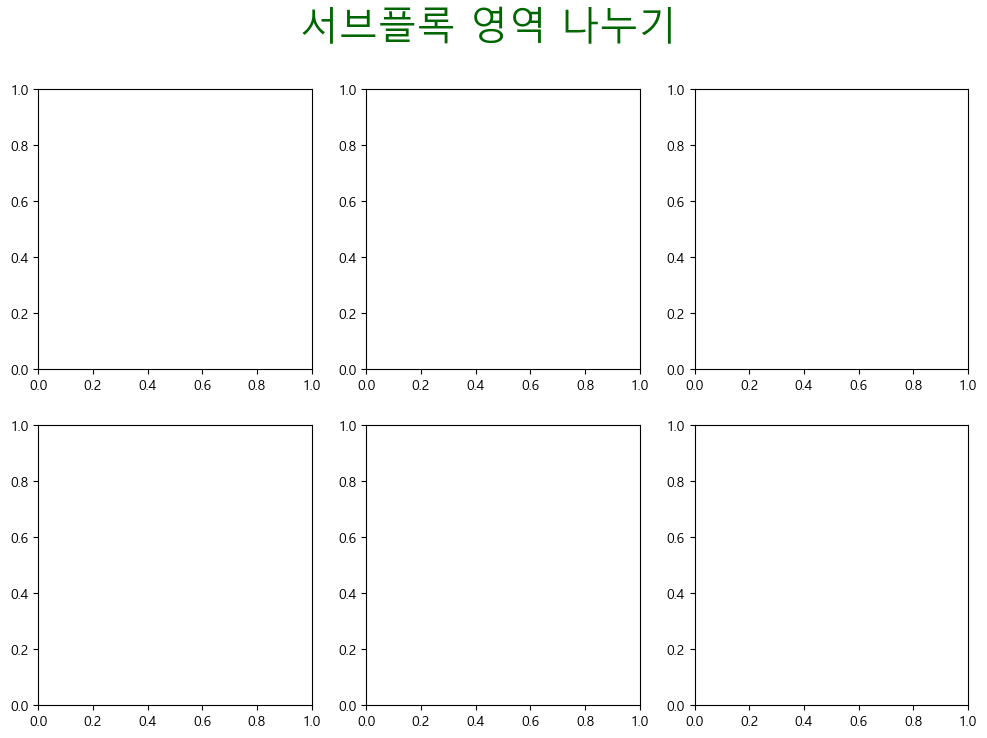

In [10]:
# 서브플롯 생성 = 2행 3열
# fig 객체 : 그래픽 처리 기능을 제공
# ax 객체 : 분활된 각 그래프 영역 (리스트)

fig, ax = plt.subplots(2, 3)

# 전체 제목
fig.suptitle('서브플록 영역 나누기', fontsize = 28, color ='#006600')

# 각 그래프 가늬 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()
plt.close()

### 03. 서브플롯에 그래프 그리기

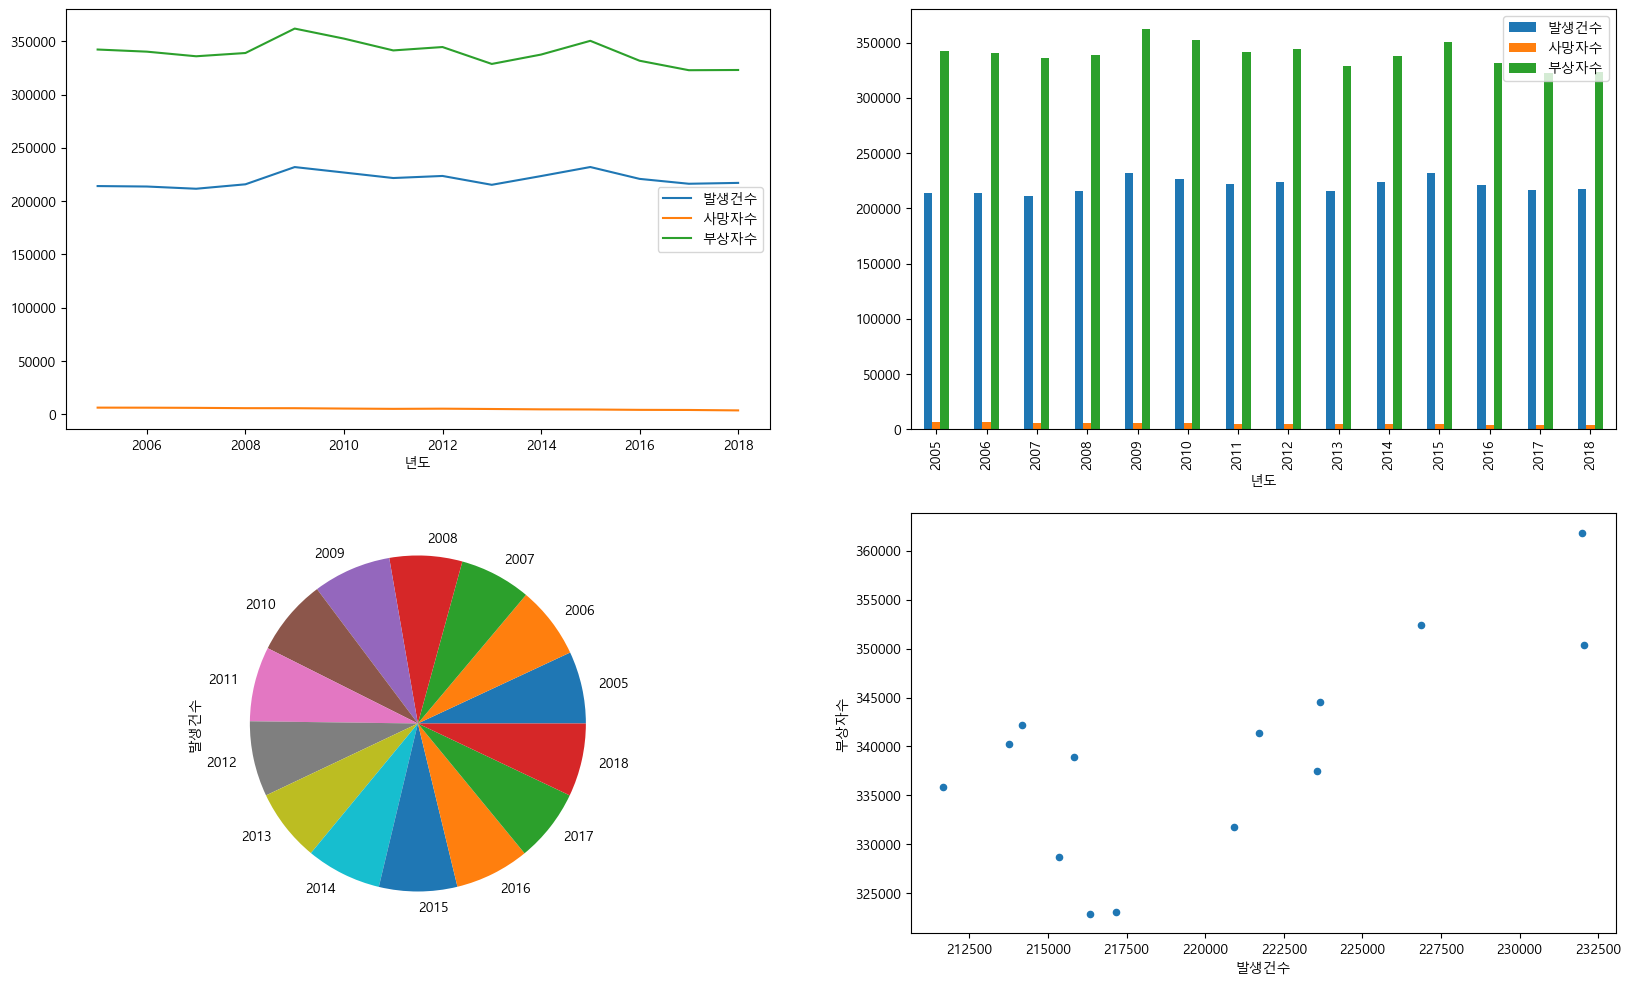

In [11]:
# 2행 2열의 영역을 생성한다. 
# -> ax에 반환되는 객체는 서브플롯의 행,열에 대한 n차원 리스트이다
# -> figsize 파라미터는 그래픽의 크기. plt.rcParams["figure.figsize"] 설정보다 우선한다.

fig, ax = plt.subplots(2, 2, figsize =(20, 12))

# 데이터 프레임을 기반으로 각 영역에 그래프를 종류별로 표시
df.plot(ax = ax[0][0])                                                              # 선
df.plot.bar(ax = ax[0][1])                                                        # 막대
df['발생건수'].plot.pie(ax = ax[1][0])                                      # 파이
df.plot.scatter(x = '발생건수', y = '부상자수', ax = ax[1][1])  # 산점도

plt.show()
plt.close()

### 04. 서브플롯 영역에 옵션 지정하기

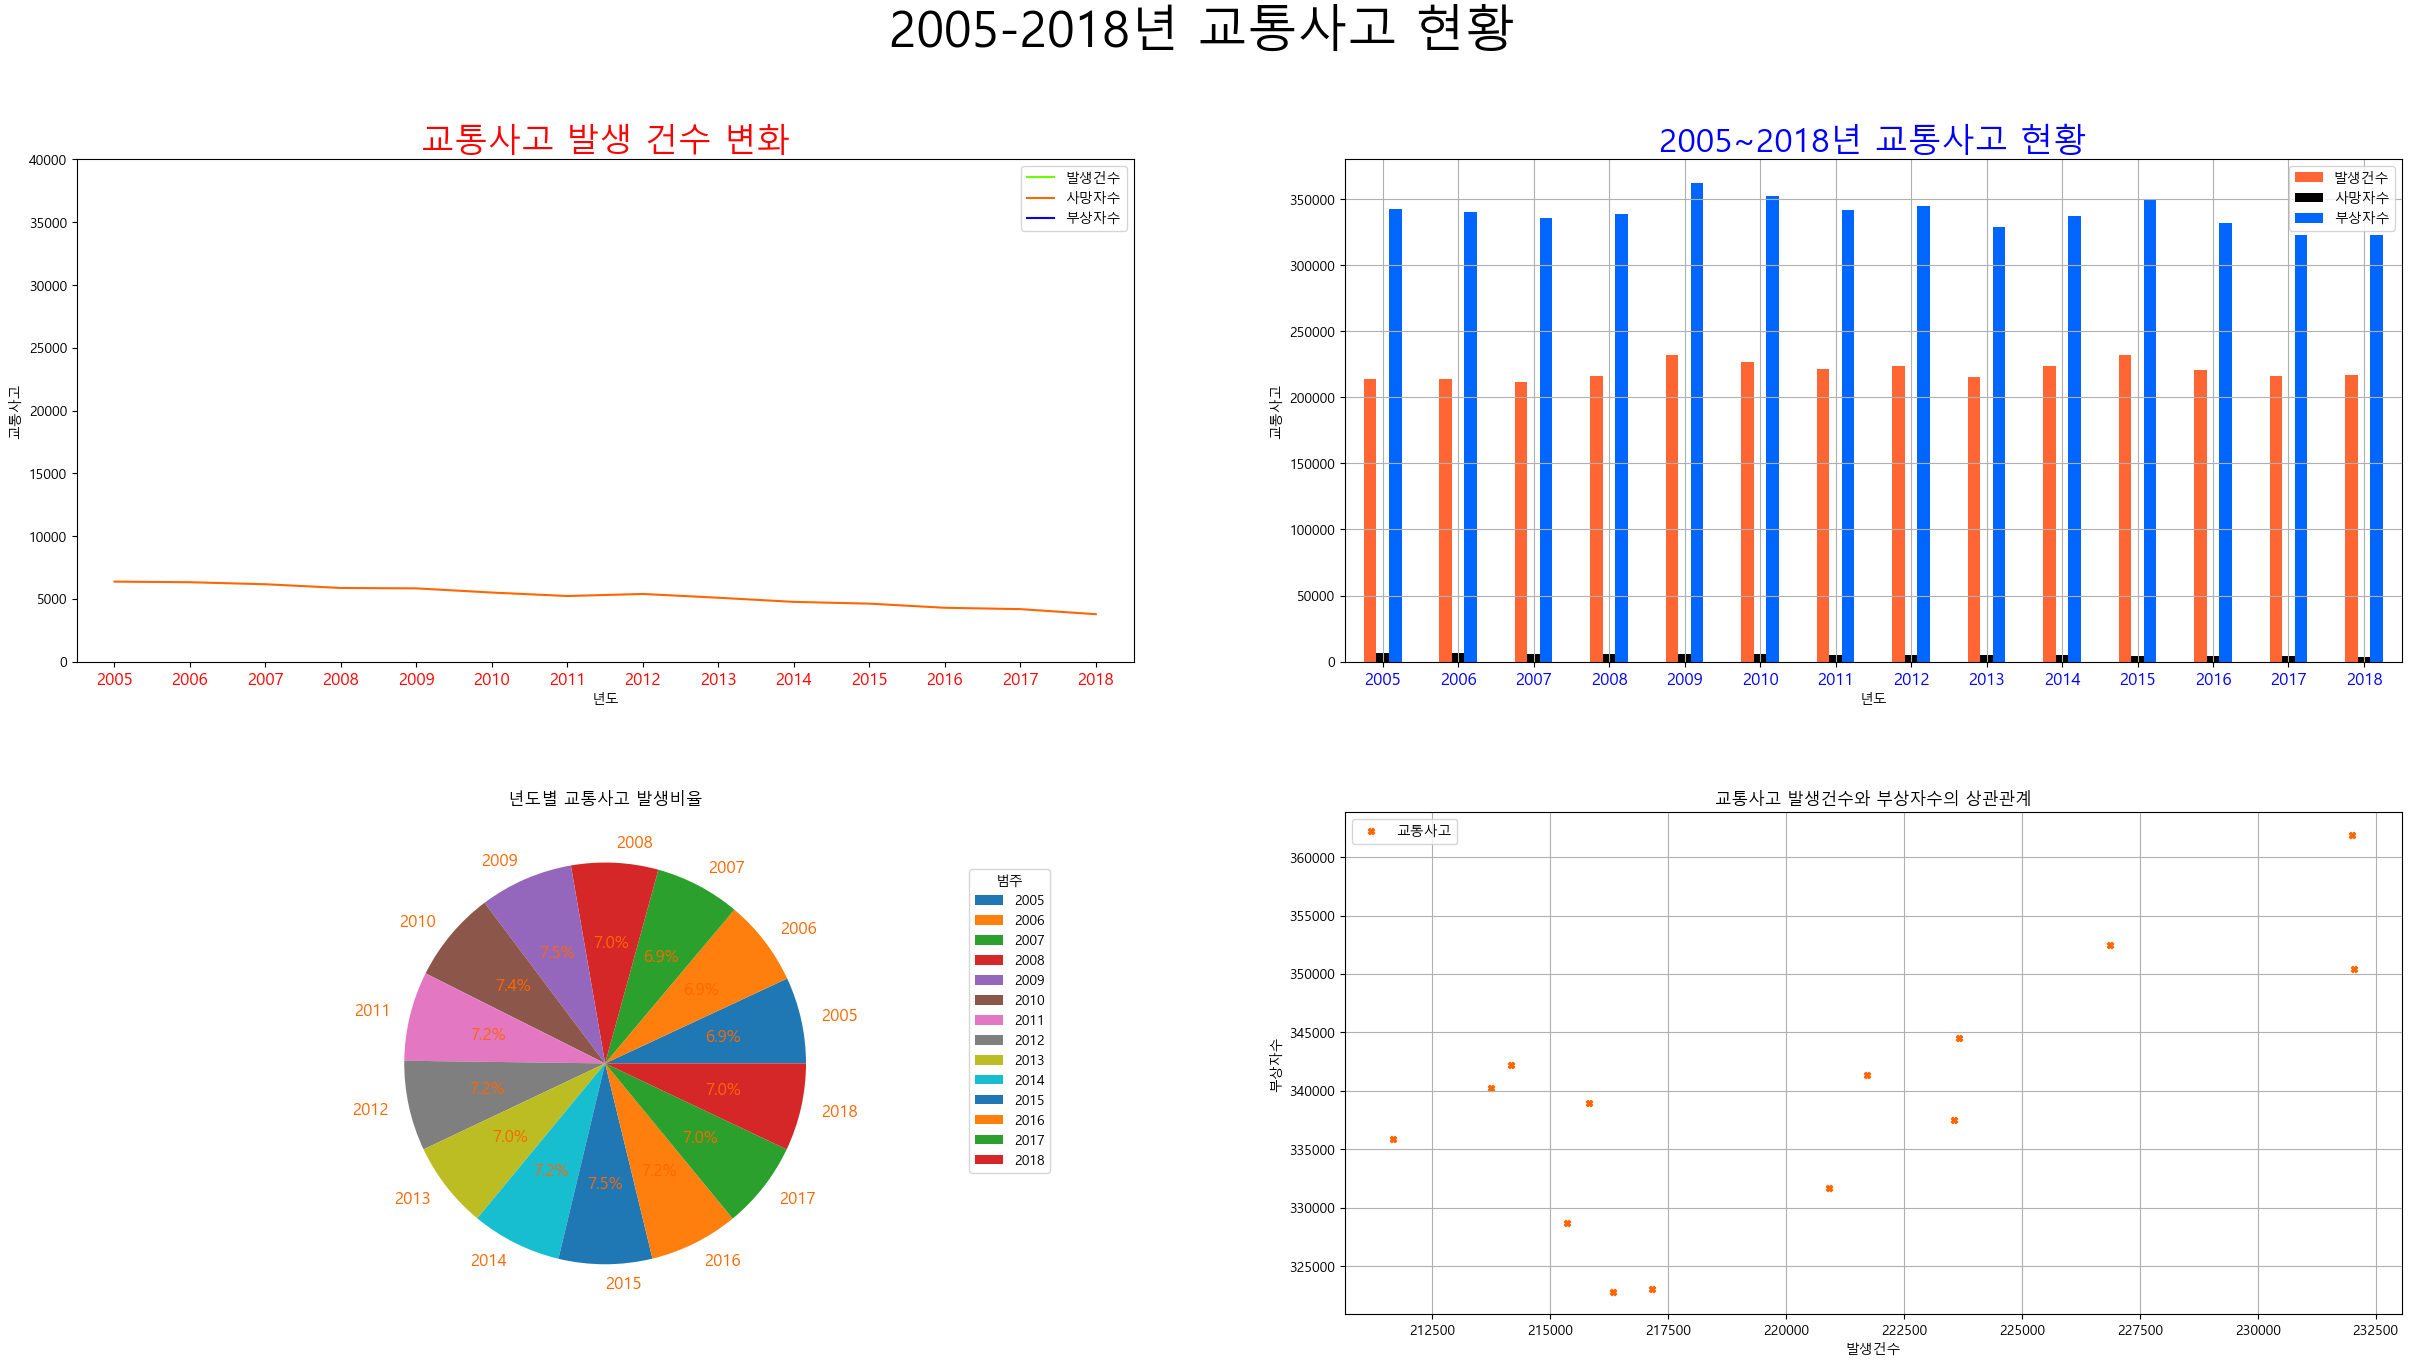

In [33]:
#--------------------------------------------------------------
# 2행 2열의 영역을 생성한다
#--------------------------------------------------------------

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (30, 15))

# 전체 제목
fig.suptitle('2005-2018년 교통사고 현황', fontsize=36, color = '#000000')

fig.subplots_adjust(wspace = 0.2, hspace = 0.3)

#----------------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
#----------------------------------------------------------------------
df.plot(ax = ax1, color = ['#66ff00', '#ff6600', '#0000ff'])

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text('교통사고 발생 건수 변화')
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax1.set(xlabel = '년도', ylabel = '교통사고')

# plt을 직접 사용할 경우 xticks(x축좌표, 표시할_텍스트) 형식으로 지정 하지만
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
start = min(df.index)
end = max(df.index)
x = list(range(start, end+1))

# -> 좌표 설정
ax1.set_xticks(x)

# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax1.set_xticklabels(df.index, fontsize = 12, color = '#ff0000')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0, 40000])

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
#--------------------------------------------------------------

# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정

df.plot.bar(ax = ax2, rot =  0, color = ['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text('2005~2018년 교통사고 현황')
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, len(df.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(df.index, fontsize = 12, color = '#0000ff')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel = '년도', ylabel = '교통사고')

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
#--------------------------------------------------------------
# 파이그래프
df['발생건수'].plot.pie(ax = ax3, labels =df.index, autopct = '%0.1f%%', 
                    textprops = {'color' : '#ff6600', 'fontsize' : 12})

ax3.title.set_text('년도별 교통사고 발생비율')
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
# bbox_to_anchor 그래프 밖에 좌표를 설정하여 범주 위치 설정
ax3.legend(labels=df.index, title = '범주', bbox_to_anchor = (1.4, 0.9)) 

#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
#--------------------------------------------------------------
# 산점도 그래프
df.plot.scatter(ax =ax4, x = '발생건수', y = '부상자수', color = '#ff6600', 
                marker = 'X', label = '교통사고')

ax4.title.set_text('교통사고 발생건수와 부상자수의 상관관계')
ax4.grid()
ax4.set(xlabel = '발생건수', ylabel = '부상자수')


plt.show()
plt.close()

### 05. 두 개의 y축을 갖는 그래프

#### 1) 샘플 데이터 만들기

In [34]:
# x축 데이터(공용)
x = list(range(0, 10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
# 첫번째 y축 데이터
y1 = list(range(0, 10, 1))
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [37]:
# 두번째 y축 데이터
y2 = list(np.arange(0, 5, 0.5))
y2

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

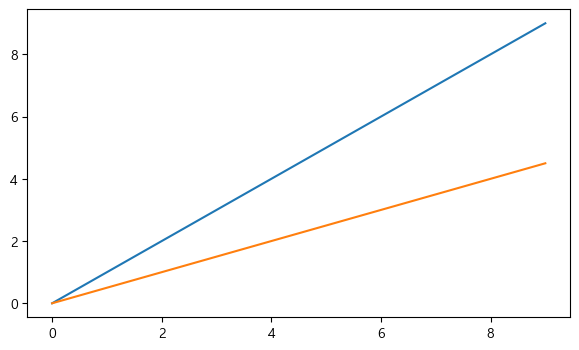

In [38]:
# 기본 그래프 구현
plt.rcParams['figure.figsize'] = (7, 4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
plt.close()

#### 2) 서브플롯으로 2개의 y축을 갖는 그래프 구현

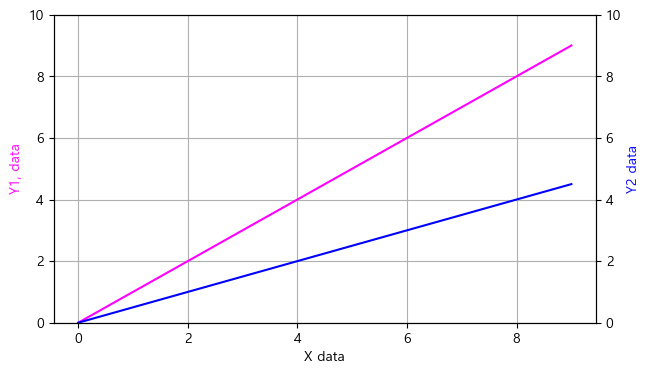

In [40]:
fig, ax1 = plt.subplots(1, 1, figsize = (7, 4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color = '#ff00ff')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1, data', color = '#ff00ff')
ax1.grid()
ax1.set_ylim([0, 10])

# ax2에 그래프 그리기
ax2.plot(x, y2, color="#0000ff")
ax2.set_ylabel('Y2 data', color='#0000ff')
ax2.set_ylim([0, 10])

plt.show()
plt.close()


### 06. (예제) 교통사고 발생건수와 사망자수 변화 시각화하기
    - 우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.
    - 이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자

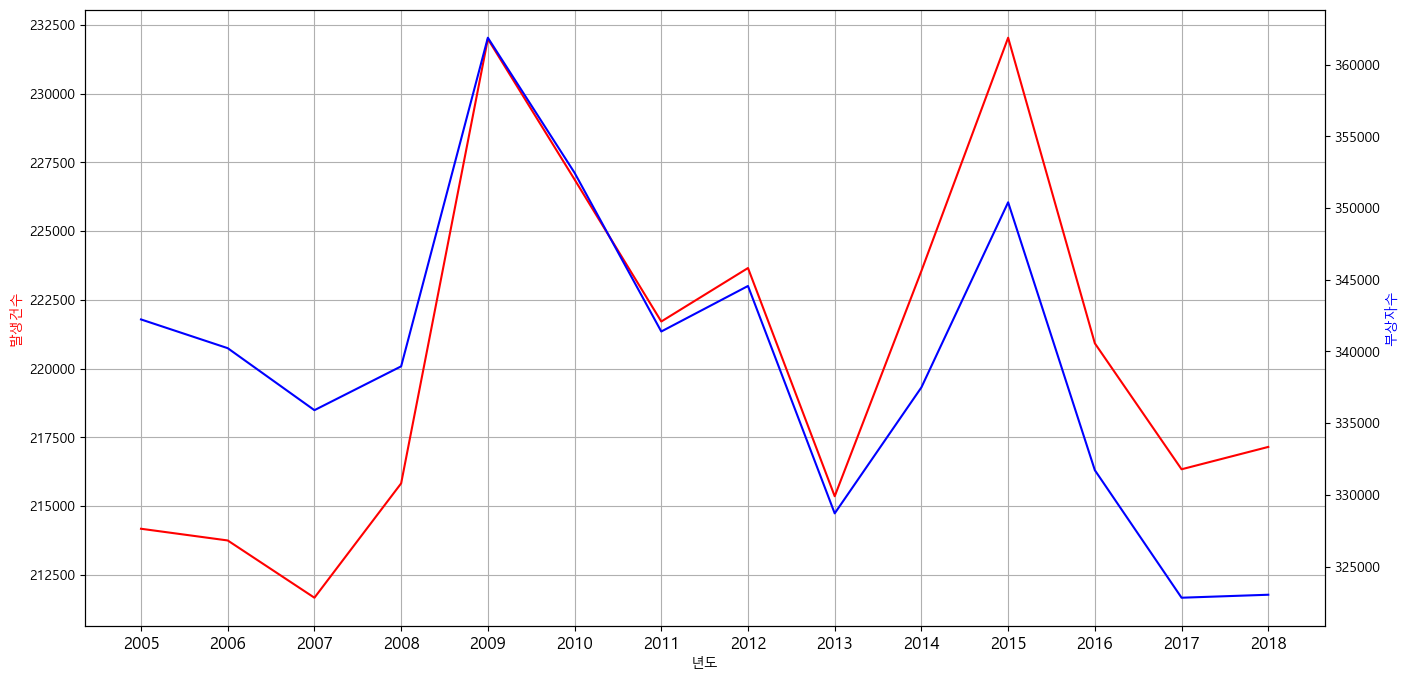

In [41]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))   # 그래프 시작
ax2 = ax1.twinx()             # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1, color='#ff0000')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(df.index);
end = max(df.index)
ax1.set_xticks(list(range(start, end+1)))
ax1.set_xticklabels(df.index, fontsize=12, color='#000000')

# ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2, color='#0000ff')
ax2.set_ylabel('부상자수', color='#0000ff')

plt.show()
plt.close()